#__Importing necessary libraries and packages__

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#**Load in the dataset**

In [85]:
os.chdir("../input")

In [86]:
data =pd.read_csv("vgsales.csv")

#**Get to know about the data**

In [87]:
data.shape

(16598, 11)

In [88]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [89]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [90]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


#**Exploring data**

In [91]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


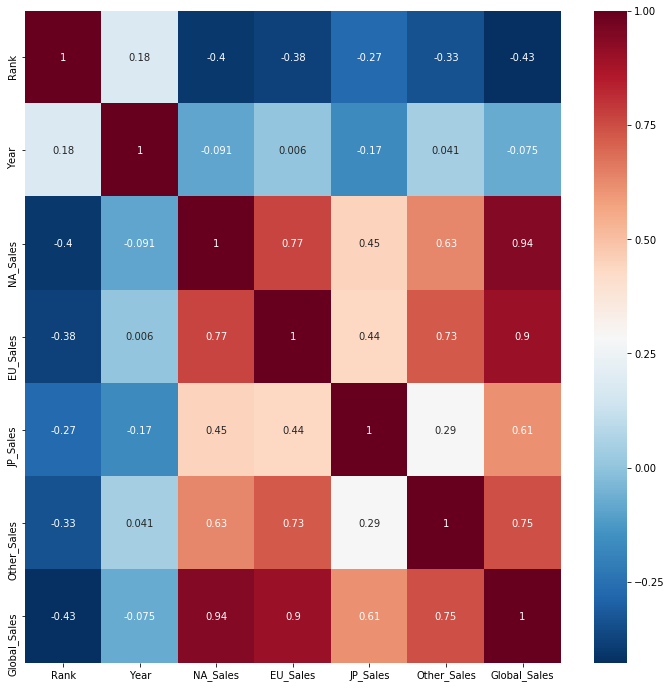

In [92]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='RdBu_r')

###**Positive values shows positive correlation whereas negative values shows inverse correlation. As we can see North American sales has contributed considerably to overall Global sales;hence we can see a positive correlation between the two.**

#**Grouping sales data of each region yearly and plotting the same**

Text(0.5, 1.0, 'Average sales over the course of years')

<Figure size 720x720 with 0 Axes>

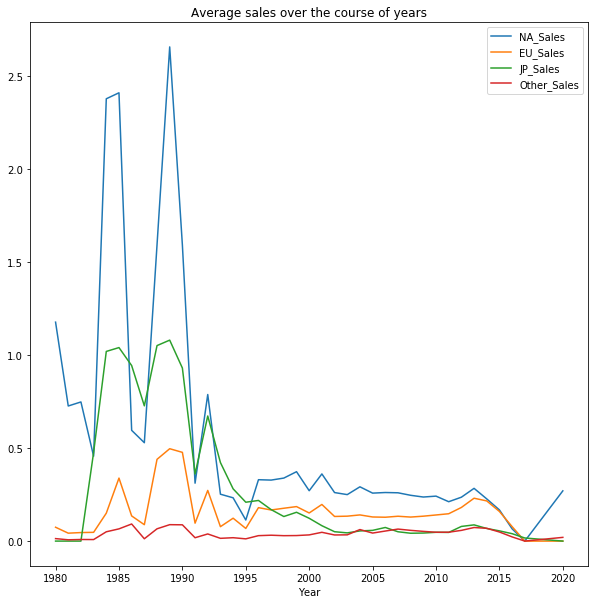

In [93]:
df1 = data.groupby(['Year'])
plt.figure(figsize=(10,10))
df1_mean = df1['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales over the course of years')

###**As we can see the video games sale was at its peak around 1990 which went on decreasing over the course of coming years**

#**Plotting frequency of the years in dataset**

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'frequency')

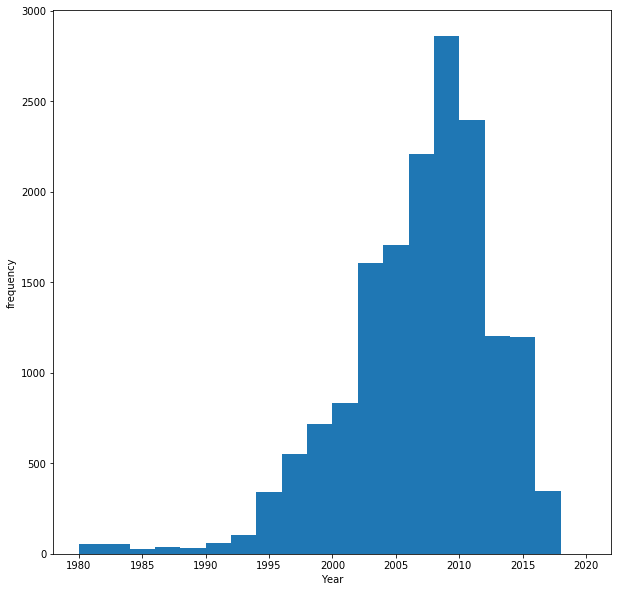

In [94]:
plt.figure(figsize=(10,10))
plt.hist(data.Year.values,bins=20)
plt.xlabel('Year')
plt.ylabel('frequency')

#**Grouping North American, Japan, European & Other region sales data as per Genre and plotting it**

In [95]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Text(0.5, 1.0, 'Sales as per Genre')

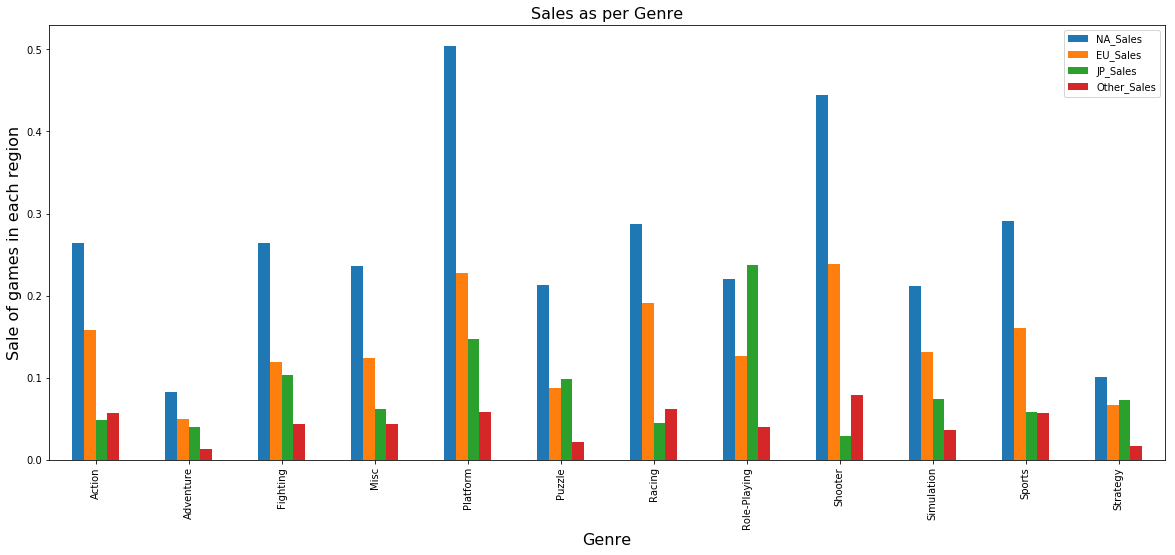

In [96]:
df3 = data.groupby(['Genre'])
val = df3['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,8))
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per Genre',fontsize=16)

###**Platform specific games have highest sales in North America followed by Shooter and Sports games. In European regions Shooter games have slightly higher demand than Platform specific ones. Japan has a higher Role-playing games.**

#**Grouping North American, Japan, European & Other region sales data as per Platform and plotting it**

In [97]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Text(0.5, 1.0, 'Sales as per Platform')

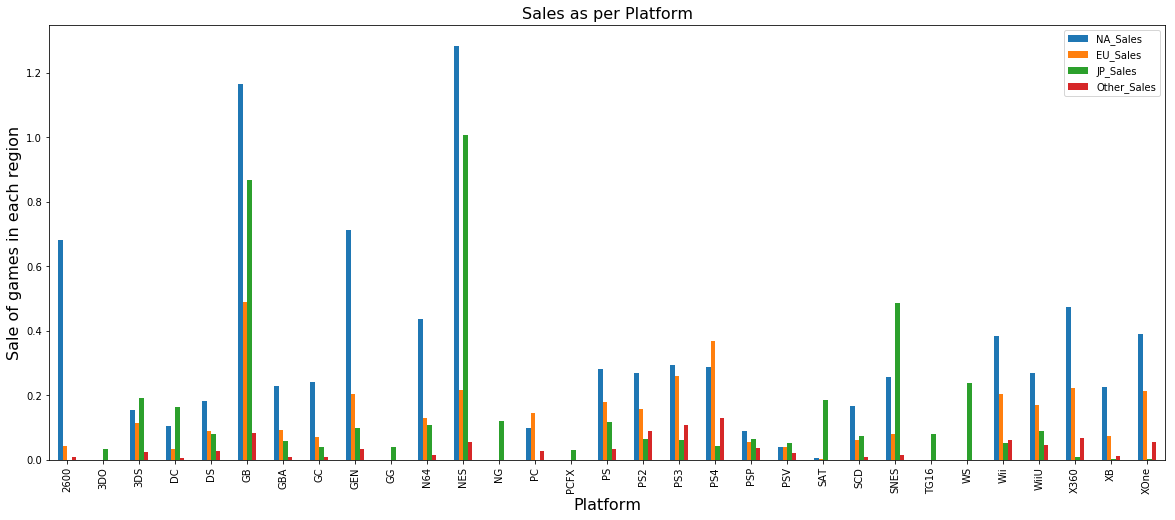

In [98]:
df3 = data.groupby(['Platform'])

val = df3['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,8))
plt.xlabel('Platform',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per Platform',fontsize=16)

###**NES shows highest sales in all regions followed by GB. 2600 shows noticeable sale in North American region as compared to other regions.**

#**Plotting Sales in all regions as per Platform**

Text(0.5, 1.0, 'Distribution of sales as per Platform')

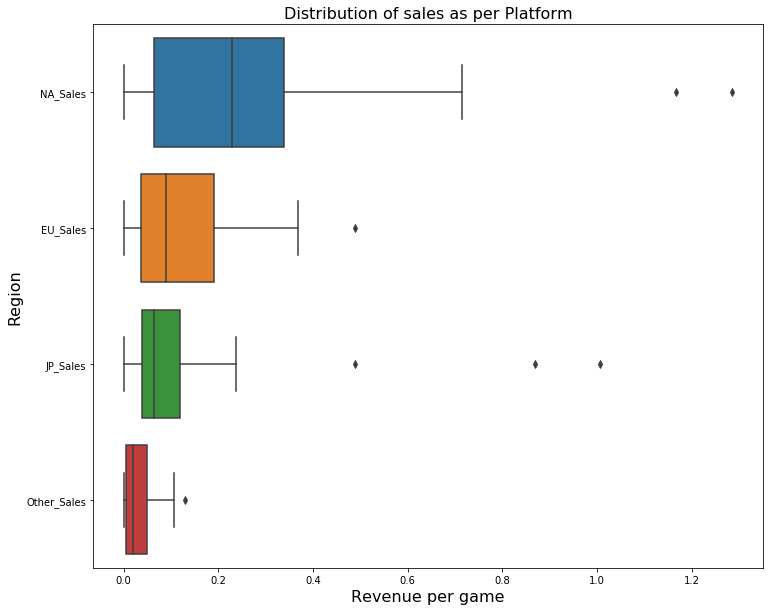

In [99]:
df3 = data.groupby(['Platform'])
val = df3['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
plt.figure(figsize=(12,10))
ax = sns.boxplot(data=val, orient='h')
plt.xlabel('Revenue per game',fontsize=16)
plt.ylabel('Region',fontsize=16)
plt.title('Distribution of sales as per Platform',fontsize=16)


In [100]:
data.Year.max()

2020.0

#**Plotting Genres included in the dataset and controlling graph using matplotlib functions**

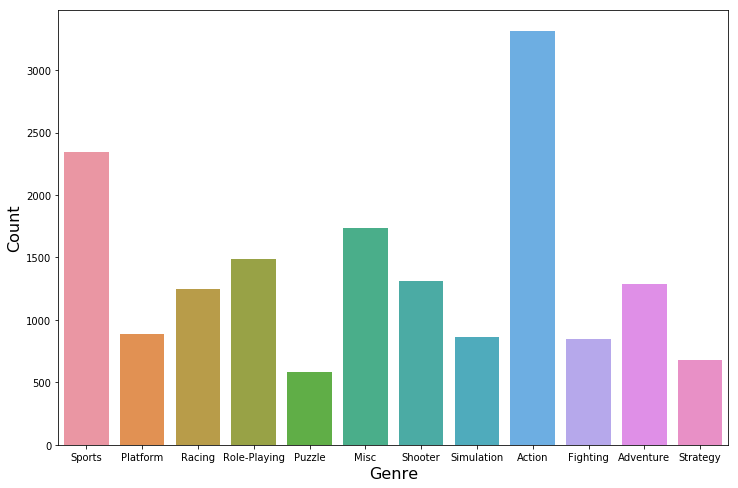

In [101]:
plt.figure(figsize=(12,8))
sns.countplot(x='Genre',data=data)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

###**Games belonging to Action genre are sold in highest numbers**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


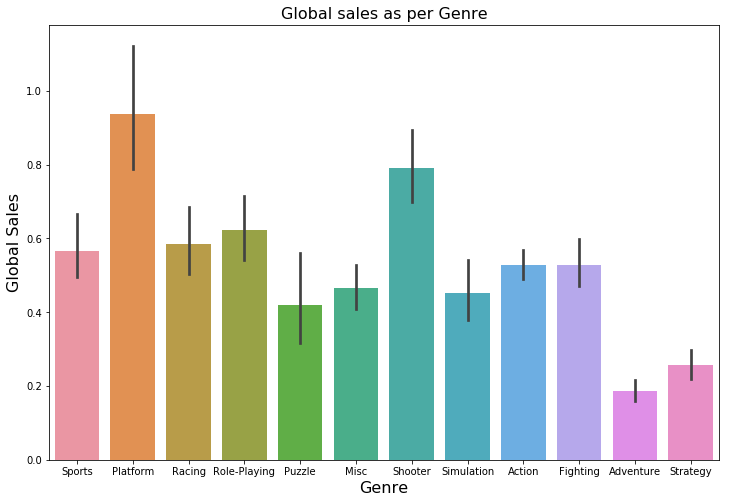

In [102]:
plt.figure(figsize=(12,8))
sns.barplot(x='Genre',y='Global_Sales',data=data)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Global Sales',fontsize=16)
plt.title('Global sales as per Genre',fontsize=16)
plt.show()

###**Platform specific games had a higher sale. However the uncertainity is also highest for same genre**

#**Scatter joint plot**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


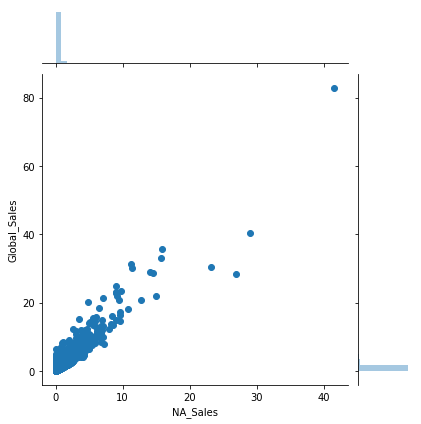

In [103]:
sns.jointplot(x='NA_Sales',y='Global_Sales',data=data)

###**Games in North America had high sales which in turn contributed to the overall Global sales.**

#**Bar plot**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


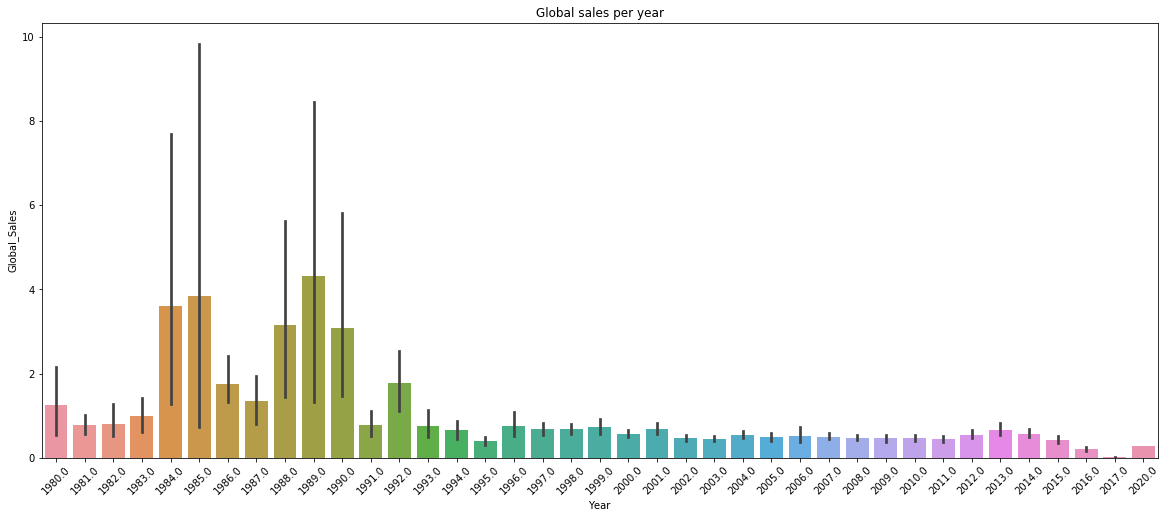

In [104]:
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Global_Sales',data=data)
plt.title('Global sales per year')
plt.xticks(rotation=45)
plt.show()

###**Highest global sales in 1989. However the uncertainity is also highest for same genre**

#**Group data according to top 3 publishers in North America, Europe, Japan and Other regions**

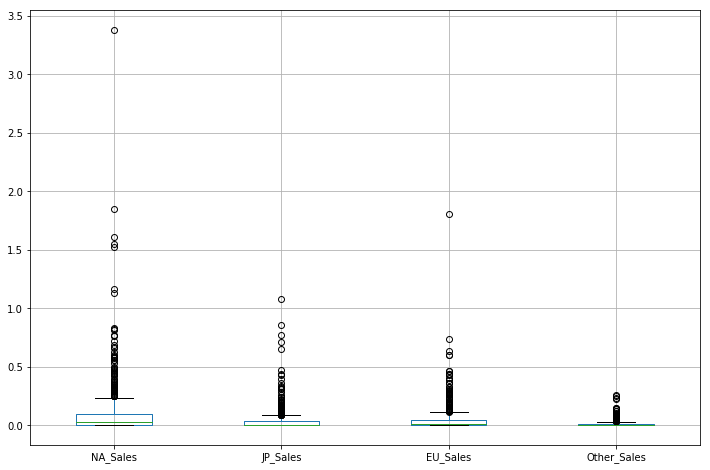

In [105]:
df_publishers = data.groupby('Publisher')
plot_publishers = df_publishers['NA_Sales','JP_Sales','EU_Sales','Other_Sales'].mean()
plt.figure(figsize=(12,8))
plot_publishers.boxplot()

###**North American sales are highest; although outerlayers are high as well**

#**Bar chart comparison for different regions in single figure**

Text(0, 0.5, 'Revenue')

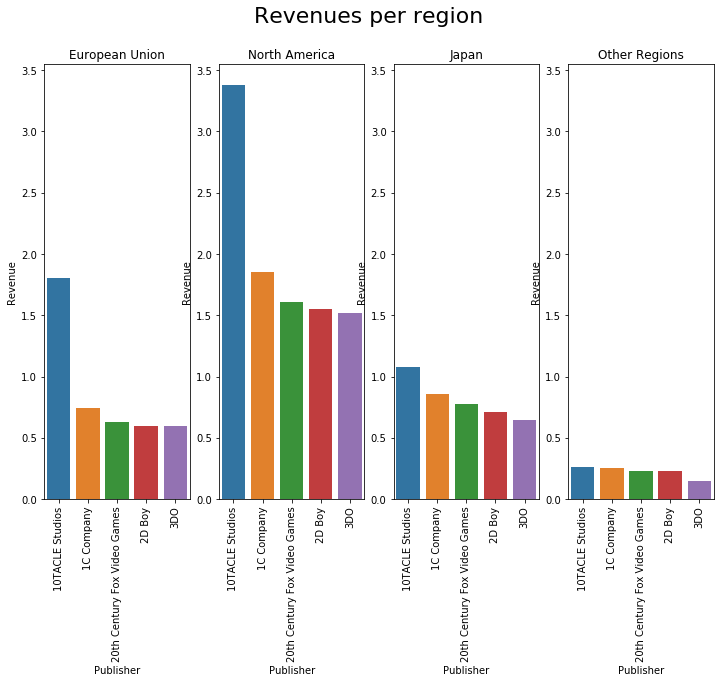

In [106]:
sort_publishers = plot_publishers.sort_values('EU_Sales',ascending=False)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = 'European Union', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).EU_Sales)
plt.title('European Union')
plt.ylabel('Revenue')
plt.suptitle('Revenues per region',size=22)
sort_publishers = plot_publishers.sort_values('NA_Sales',ascending=False)
ax2 = fig.add_subplot(1,4,2,sharey=ax1)
ax2.set_xticklabels(labels = 'North America', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).NA_Sales)
plt.title('North America')
plt.ylabel('Revenue')
sort_publishers = plot_publishers.sort_values('JP_Sales',ascending=False)
ax3 = fig.add_subplot(1,4,3,sharey=ax1)
ax3.set_xticklabels(labels = 'Japan', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).JP_Sales)
plt.title('Japan')
plt.ylabel('Revenue')
sort_publishers = plot_publishers.sort_values('Other_Sales',ascending=False)
ax4 = fig.add_subplot(1,4,4,sharey=ax1)
ax4.set_xticklabels(labels = 'Japan', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).Other_Sales)
plt.title('Other Regions')
plt.ylabel('Revenue')